In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import torch
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import VarianceThreshold
import torch_geometric.transforms as T
from torch_geometric.datasets import IMDB
import matplotlib.pyplot as plt

## IMDB

In [2]:
dataset = IMDB(root='./imdb_data')
data = dataset[0]
data

Extracting imdb_data/raw/IMDB_processed.zip
Processing...
Done!


HeteroData(
  movie={
    x=[4278, 3066],
    y=[4278],
    train_mask=[4278],
    val_mask=[4278],
    test_mask=[4278]
  },
  director={ x=[2081, 3066] },
  actor={ x=[5257, 3066] },
  (movie, to, director)={ edge_index=[2, 4278] },
  (movie, to, actor)={ edge_index=[2, 12828] },
  (director, to, movie)={ edge_index=[2, 4278] },
  (actor, to, movie)={ edge_index=[2, 12828] }
)

In [3]:
movie = data['movie'].x.tolist()
df = pd.DataFrame(movie)
df['class'] = data['movie'].y.tolist()

Feature selection from Bag-of-Words features of Movie node

In [4]:
class0 = df[df['class'] == 0].drop(['class'], axis=1)
X = class0
sel = VarianceThreshold(threshold=(.06 * (1 - .06)))
fitted_X = sel.fit_transform(X)
imp_feat0 = pd.DataFrame(fitted_X)
imp_feat0 = imp_feat0.drop(imp_feat0[imp_feat0.sum(axis=1) == 0.0].index)
imp_feat0.head()

,0,1,2,3
3,0.0,0.0,1.0,0.0
19,0.0,1.0,0.0,0.0
28,0.0,0.0,0.0,1.0
44,0.0,1.0,0.0,0.0
53,0.0,0.0,0.0,1.0


In [5]:
class1 = df[df['class'] == 1].drop(['class'], axis=1)
X = class1
sel = VarianceThreshold(threshold=(.06 * (1 - .06)))
fitted_X = sel.fit_transform(X)
imp_feat1 = pd.DataFrame(fitted_X)
imp_feat1 = imp_feat1.drop(imp_feat1[imp_feat1.sum(axis=1) == 0.0].index)
imp_feat1.head()

,0,1,2,3,4,5,6,7,8,9,10,11
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
class2 = df[df['class'] == 2].drop(['class'], axis=1)
X = class2
sel = VarianceThreshold(threshold=(.06* (1 - .06)))
fitted_X = sel.fit_transform(X)
imp_feat2 = pd.DataFrame(fitted_X)
imp_feat2 = imp_feat2.drop(imp_feat2[imp_feat2.sum(axis=1) == 0.0].index)
imp_feat2.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Features of each class of Movie node sampled using Diffusion Models

In [7]:
sampled0  = pd.DataFrame(torch.load('../sampled_features/imdb/features0.pt')[0].cpu().numpy())
sampled0.head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,3.0,3.0,0.0,0.0


In [8]:
sampled1  = pd.DataFrame(torch.load('../sampled_features/imdb/features1.pt')[0].cpu().numpy())
sampled1.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
sampled2  = pd.DataFrame(torch.load('../sampled_features/imdb/features2.pt')[0].cpu().numpy())
sampled2.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Comparison of real and synthetic distributions for the most important feature

In [10]:
def cosine_sim(original,sampled):
    return cosine_similarity(original, sampled)

In [11]:
def feature_selection(df_sampled):
    col_sum = df_sampled.sum(axis=0)
    sorted_colsum = sorted(col_sum, reverse=True)

    index_list = []
    for i in sorted_colsum[:1]:
        index_list.append(list(col_sum).index(i))
        imp_feat = df_sampled[index_list].reset_index(drop=True)
        return imp_feat, index_list

In [12]:
plt.rcParams.update({'axes.ymargin': 0.2})

In [13]:
def count_plot(df,ind):

    fig, ax = plt.subplots(figsize=(7, 7))
    sns.countplot(data=df,x=ind,width=0.3,ax=ax)
    #https://www.geeksforgeeks.org/how-to-show-values-on-seaborn-barplot/
    for i in ax.containers:
        ax.bar_label(i,fontsize=20)
    plt.xticks(fontsize=20)

    plt.yticks(fontsize=20)
    plt.xlabel('feature values',fontsize=20)
    plt.ylabel('no. of samples',fontsize=20)

    plt.show()

Movie class 0

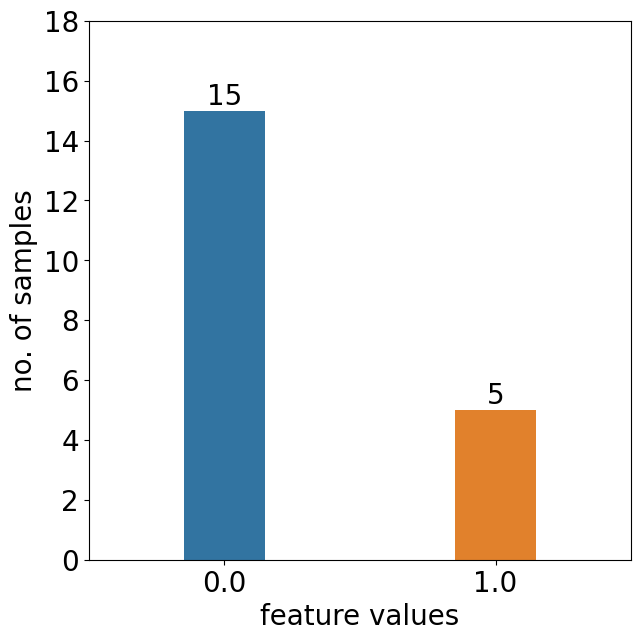

In [14]:
#Real
real_class0= np.array(imp_feat0)
syn_imp_feat0,index_list = feature_selection(sampled0)
syn_ind0=index_list[0]
real_imp_feat0, index_list = feature_selection(pd.DataFrame(real_class0))
real_ind0=index_list[0]
count_plot(pd.DataFrame(real_class0)[:syn_imp_feat0.shape[0]], real_ind0)

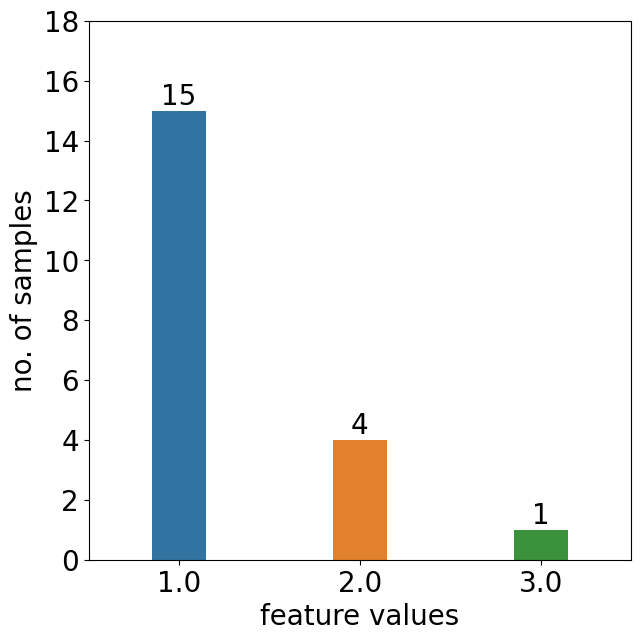

In [15]:
#Synthetic
count_plot(sampled0, syn_ind0)

Movie class 1

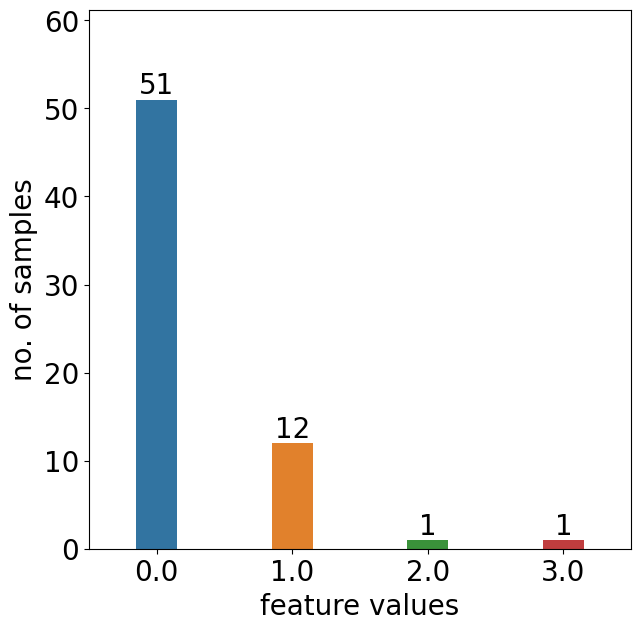

In [16]:
#Real
real_class1= np.array(imp_feat1)
syn_imp_feat1,index_list = feature_selection(sampled1)
syn_ind1=index_list[0]
real_imp_feat1, index_list = feature_selection(pd.DataFrame(real_class1))
real_ind1=index_list[0]
count_plot(pd.DataFrame(real_class1)[:syn_imp_feat1.shape[0]], real_ind1)

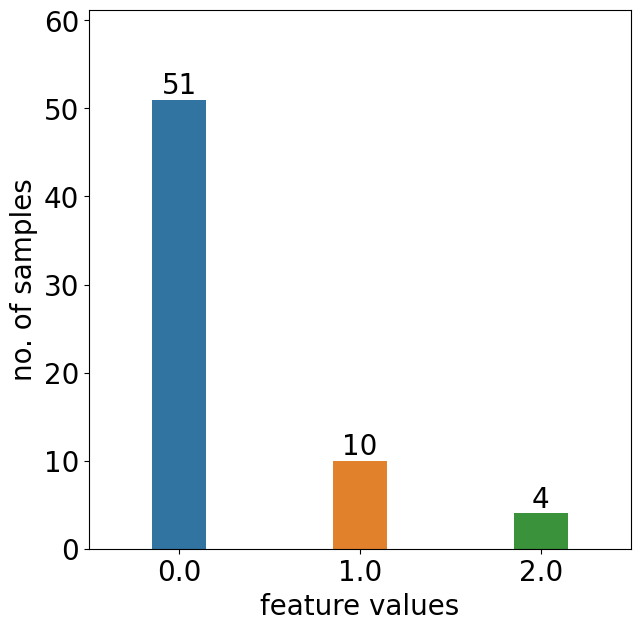

In [17]:
#Synthetic
count_plot(sampled1, syn_ind1)

Movie class 2

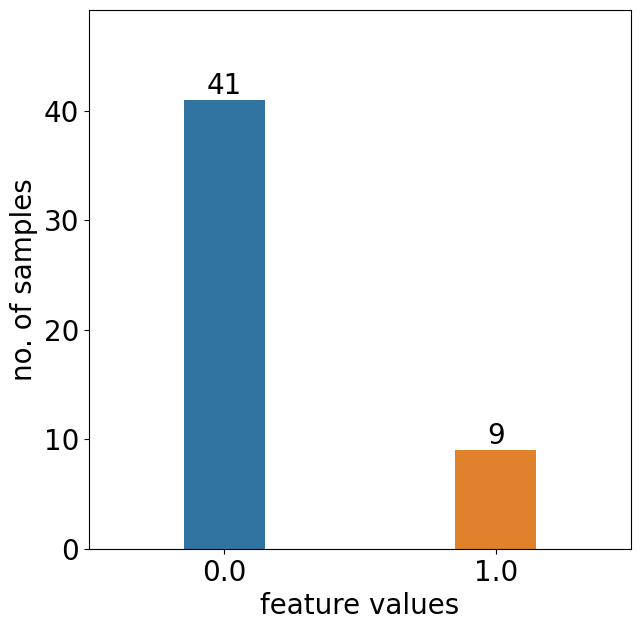

In [18]:
#Real
real_class2= np.array(imp_feat2)
syn_imp_feat2,index_list = feature_selection(sampled2)
syn_ind2=index_list[0]
real_imp_feat2, index_list = feature_selection(pd.DataFrame(real_class2))
real_ind2=index_list[0]
count_plot(pd.DataFrame(real_class2)[:syn_imp_feat2.shape[0]], real_ind2)

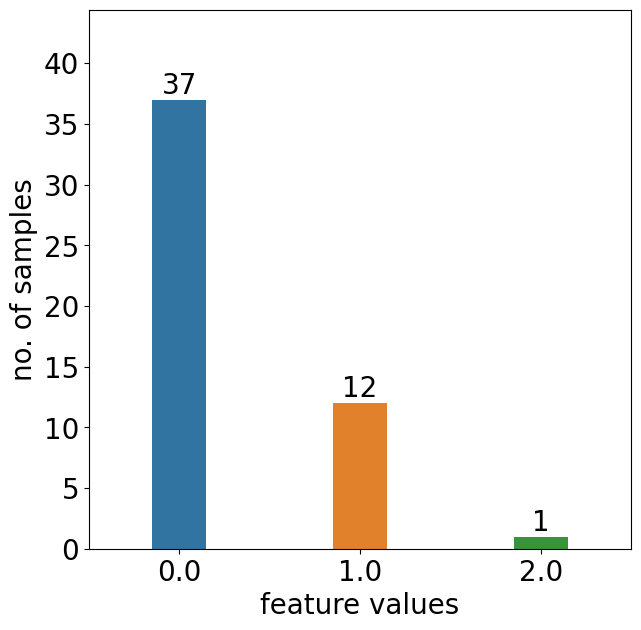

In [19]:
#Synthetic
count_plot(sampled2, syn_ind2)

### Pairwise cosine similarity of all features for real and synthetic distributions

Movie class 0

In [20]:
cosine_sim(real_class0,sampled0)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.70710678, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.70710678, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.70710678, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.        ]])

In [21]:
sns.set(font_scale=1.4)

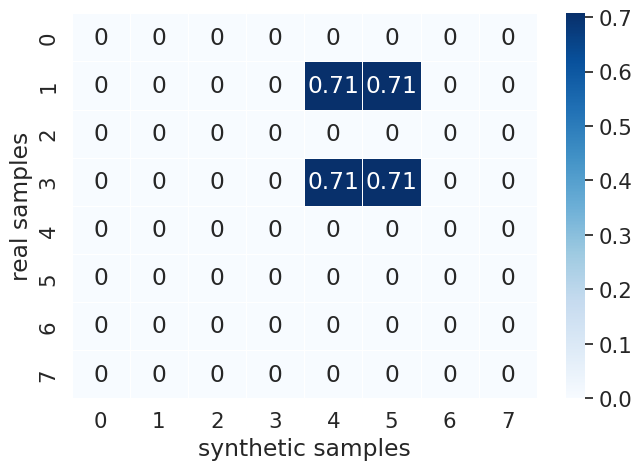

In [22]:
fig, ax = plt.subplots(figsize=(7.5,5)) 
sns.heatmap(cosine_sim(real_class0[:8],sampled0[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

Movie class 1

In [23]:
cosine_sim(real_class1,sampled1)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.40824829, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.81649658, 0.70710678, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.89442719, 0.        , 0.        , ..., 0.        , 0.70710678,
        0.        ],
       [0.4472136 , 0.        , 0.70710678, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

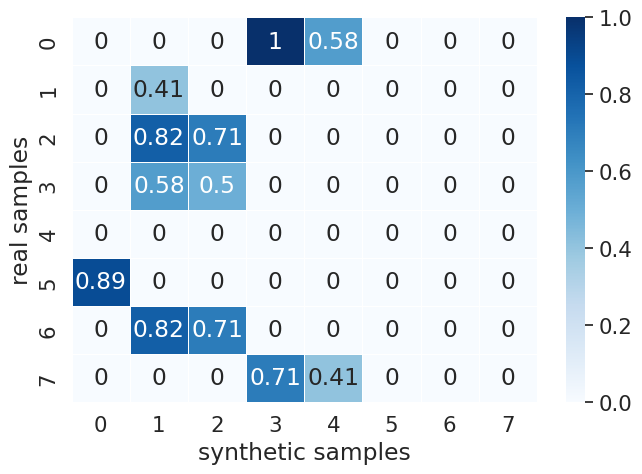

In [24]:
fig, ax = plt.subplots(figsize=(7.5,5))
sns.heatmap(cosine_sim(real_class1[:8],sampled1[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()

Movie class 2

In [25]:
cosine_sim(real_class2,sampled2)

array([[0.        , 0.        , 0.        , ..., 0.70710678, 0.5547002 ,
        0.        ],
       [0.        , 0.70710678, 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.46153846,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

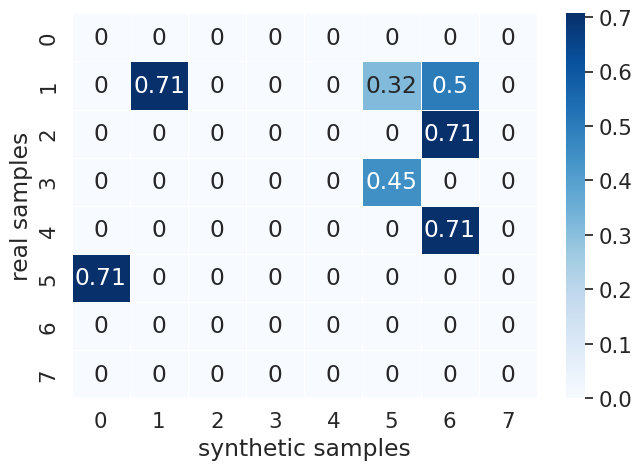

In [26]:
fig, ax = plt.subplots(figsize=(7.5,5)) 
sns.heatmap(cosine_sim(real_class2[:8],sampled2[:8]), 
            xticklabels = 1, yticklabels = 1, annot=True, cmap='Blues', linewidth=.5)
plt.xlabel("synthetic samples") 
plt.ylabel("real samples") 
plt.show()